In [131]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [132]:
np.random.seed(0)

In [133]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [134]:
assert(X_train.shape[0] == y_train.shape[0]), "the no. of images != no. of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the no. of images != no. of labels"
assert(X_train.shape[1:] == (28, 28)), "the dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "the dimensions of images are not 28x28"

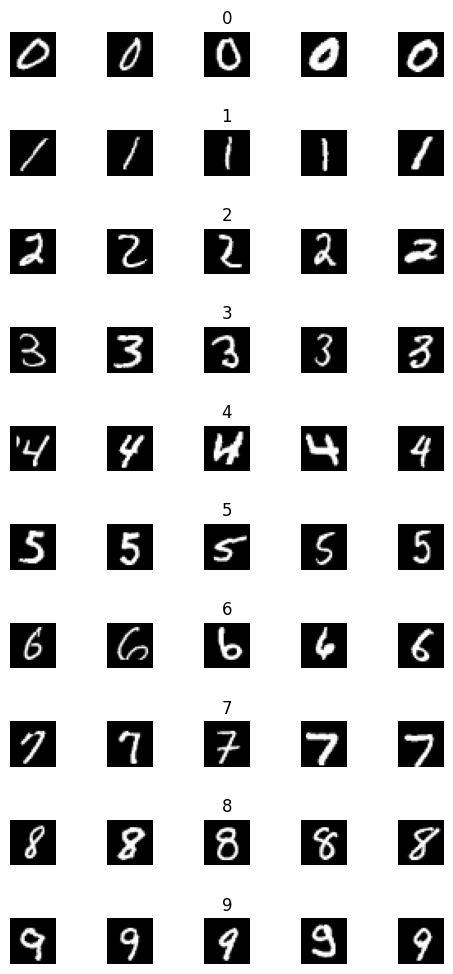

In [135]:
num_of_samples = []
cols = 5
num_of_classes = 10
fig, axes = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for col in range(cols):
  for i in range(num_of_classes):
    x_selected = X_train[y_train == i]
    axes[i][col].imshow(x_selected[random.randint(0, len(x_selected - 1))], cmap=plt.get_cmap("gray"))
    axes[i][col].axis("off")
    if col == 2:
      axes[i][col].set_title(str(i))
      num_of_samples.append(len(x_selected))

Text(0, 0.5, 'no. of images')

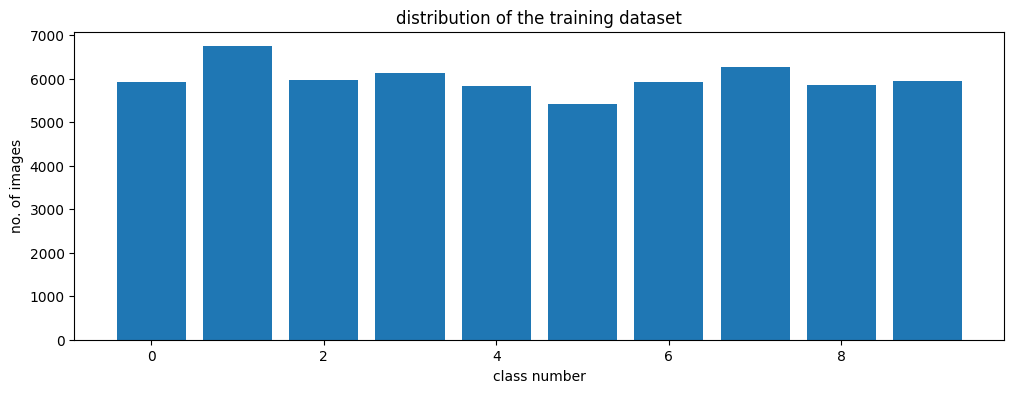

In [136]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("no. of images")

In [137]:
#hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [138]:
X_train = X_train/255
X_test = X_test/255

In [139]:
num_of_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_of_pixels)
X_test = X_test.reshape(X_test.shape[0], num_of_pixels)

In [140]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_of_pixels, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_of_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [141]:
model = create_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [142]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7130 - loss: 0.8460 - val_accuracy: 0.9280 - val_loss: 0.2521
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9179 - loss: 0.2781 - val_accuracy: 0.9312 - val_loss: 0.2295
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.2479 - val_accuracy: 0.9393 - val_loss: 0.2087
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9308 - loss: 0.2295 - val_accuracy: 0.9368 - val_loss: 0.2135
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9342 - loss: 0.2204 - val_accuracy: 0.9443 - val_loss: 0.1945
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9373 - loss: 0.2062 - val_accuracy: 0.9435 - val_loss: 0.1887
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1943 - val_accuracy: 0.9418 - val_loss: 0.1954
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9390 - loss: 0.2025 - val_accuracy: 0.

Text(0.5, 0, 'epoch')

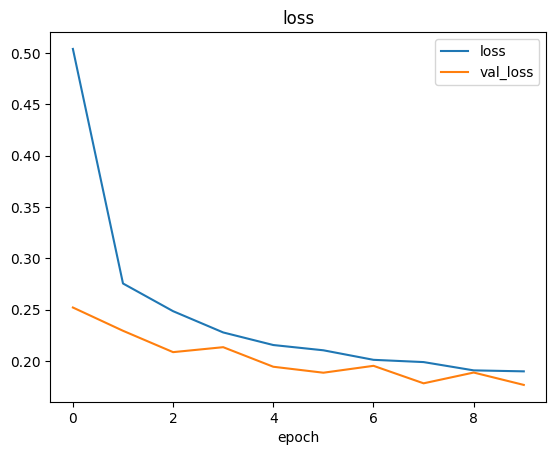

In [143]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

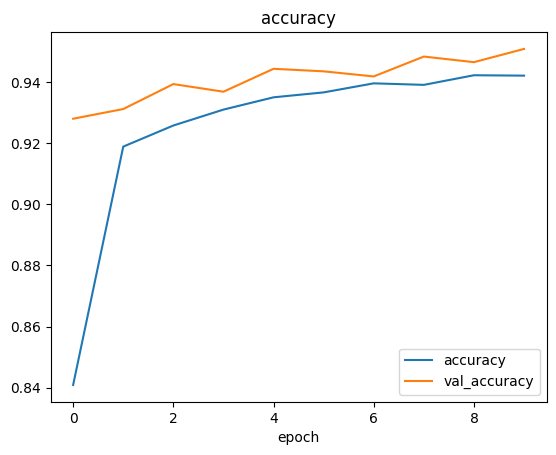

In [144]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [145]:
score = model.evaluate(X_test, y_test, verbose=0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.2208021730184555
test accuracy:  0.9387999773025513


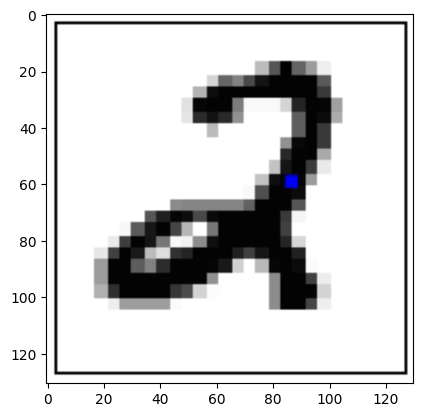

In [146]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

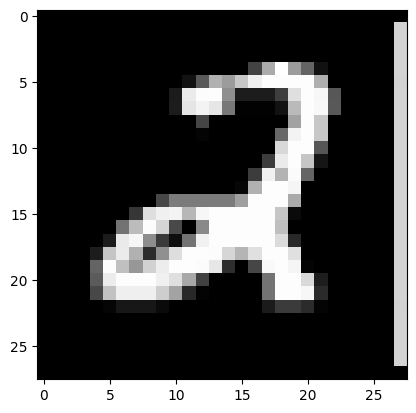

In [147]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [148]:
image = image/255
image = image.reshape(1, 784)

In [149]:
predictions = model.predict(image)
prediction = np.argmax(predictions, axis=1)
print("predicted digit: ", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
predicted digit:  [2]
